# Constructing EOS and solving TOV equations

This example notebook shows how to construct the equation of state with the metamodel and speed-of-sound extension scheme parametrization used in the paper, as well as solve the TOV equations. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"],
          "xtick.labelsize": 16,
          "ytick.labelsize": 16,
          "axes.labelsize": 16,
          "legend.fontsize": 16,
          "legend.title_fontsize": 16}
plt.rcParams.update(params)

import jax
import jax.numpy as jnp

from jesterTOV.eos import Interpolate_EOS_model, construct_family
import jesterTOV.utils as utils

# Equation of state

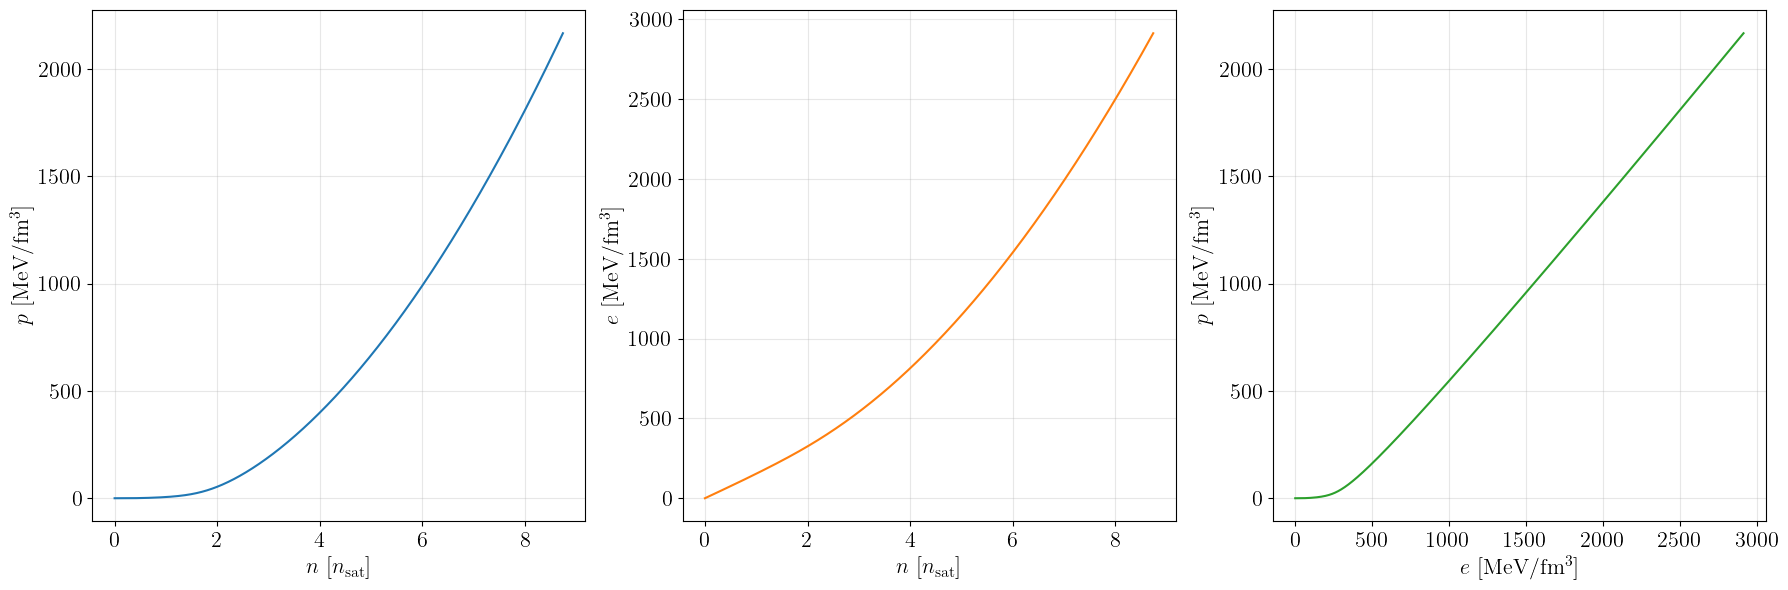

In [5]:

e1,p1,d1 = np.loadtxt('eos_nl3.out',usecols=(0,1,2),unpack=True)
e2,p2,d2 = np.loadtxt('eos_SLY4.out',usecols=(0,1,2),unpack=True)


# Create an instance of the Interpolate_EOS_model
eos_interpolator = Interpolate_EOS_model()

# Call the interpolate_eos method with the loaded data
ns, ps, hs, es, dloge_dlogps = eos_interpolator.interpolate_eos(n=d1, p=p1, e=e1)

nsat = 0.16 # nuclear saturation density in fm^-3


# For the plot, let's make some conversions to more common units
ns_plots = ns / utils.fm_inv3_to_geometric / 0.16
es_plots = es / utils.MeV_fm_inv3_to_geometric
ps_plots = ps / utils.MeV_fm_inv3_to_geometric

# Create a figure with 3 subplots in a single row
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Pressure vs Number Density
axes[0].plot(ns_plots, ps_plots, color='tab:blue')
axes[0].set_xlabel(r"$n$ [$n_{\rm{sat}}$]")
axes[0].set_ylabel(r"$p$ [MeV/fm$^3$]")
axes[0].grid(True, alpha=0.3)

# Plot 2: Energy Density vs Number Density
axes[1].plot(ns_plots, es_plots, color='tab:orange')
axes[1].set_xlabel(r"$n$ [$n_{\rm{sat}}$]")
axes[1].set_ylabel(r"$e$ [MeV/fm$^3$]")
axes[1].grid(True, alpha=0.3)

# Plot 3: Pressure vs Energy Density
axes[2].plot(es_plots, ps_plots, color='tab:green')
axes[2].set_xlabel(r"$e$ [MeV/fm$^3$]")
axes[2].set_ylabel(r"$p$ [MeV/fm$^3$]")
axes[2].grid(True, alpha=0.3)

# Improve layout and spacing
plt.tight_layout()
plt.show()
plt.close()

# Neutron stars

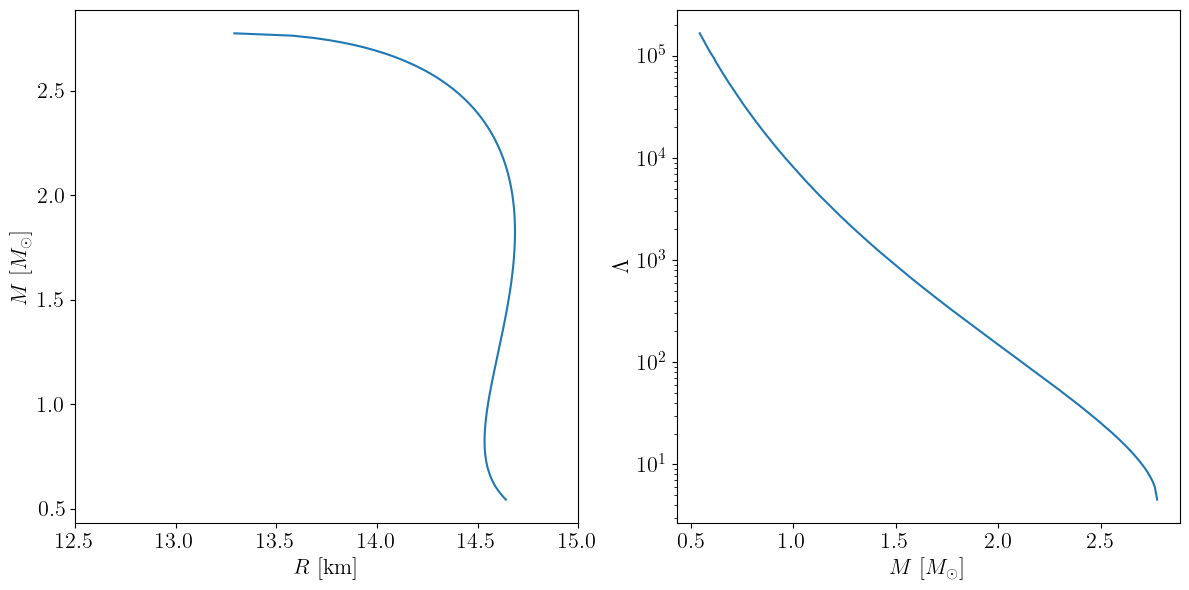

In [12]:
# Solve TOV equations:
eos_tuple = (ns, ps, hs, es, dloge_dlogps)
logpc, masses, radii, Lambdas = construct_family(eos_tuple, ndat = 200, min_nsat = 1.0)

# Make a plot
plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))

# Limit masses to be above certain mass to make plot prettier
m_min = 0.5
mask = masses > m_min
masses = masses[mask]
radii = radii[mask]
Lambdas = Lambdas[mask]

# M(R) plot
plt.subplot(121)
plt.plot(radii, masses)
plt.xlabel(r"$R$ [km]")
plt.ylabel(r"$M$ [$M_\odot$]")
plt.xlim(12.5,15)

# Lambda(R) plot
plt.subplot(122)
plt.plot(masses, Lambdas)
plt.xlabel(r"$M$ [$M_\odot$]")
plt.ylabel(r"$\Lambda$")
plt.yscale("log")
plt.tight_layout()
plt.show()
plt.close()